# Лабораторная работа №5

## Вариант №2 Задание №7

Дифференциальная задача:
$$ 
\left.\begin{array}{l}
\frac{\partial u}{\partial t}+a(x, t) \frac{\partial u}{\partial x} = b(x, t) ; \quad a(x, t) \geq 0 \\
u(x, 0) = \varphi(x) ; \quad 0 \leq x \leq 1 \\
u(0, t) = \psi(t) ; \quad 0 \leq t \leq 1
\end{array} \right \}
$$

$$ a(x,t) = 1 + x, b(x,t) = 1 $$
$$ \varphi(x) = sin(x), \psi(t) = sin(e^{-t} - 1) + t $$

Разностная схема:
$$
\left.D_h=\left\{\left(x_l, t^n\right): x_l=h l, h L=1, l=\overline{0, L} ; t^n=n \tau, \tau N=1, n=\overline{0, N}\right)\right\}
$$

$$
\left.\begin{array}{l}
u^{n+1}_l = u^n_l - (1 + x_l) \frac{\tau}{2h} (1 - \frac{\tau}{2}) (u^n_{l-2} - 4 u^n_{l-1} + 3 u^n_l) + (1 + x_l)^2 \frac{\tau^2}{2h^2} (u^n_{l-2} - 2 u^n_{l-1} + u^n_l), l = \overline{2,L}, n = \overline{0,N-1}; \\
u^0_l = sin(x_l), l = \overline{0,L}; \\
u^n_0 = sin(e^{-t^n} - 1) + t^n, n = \overline{1,N}
\end{array} \right \}
$$

In [1]:
import math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### Аналитическое решение

In [2]:
def analytical(x,t : float):#найти самостоятельно
    return t + np.sin( (x + 1 - math.exp(t)) / math.exp(t) )

In [3]:
#все функции вплоть до раздела "Численное решение" написать самостоятельно
def a(x, t = 0):
    return 1 + x

def der_a_t(x,t = 0):#производная по времени
    return 0

def der_a_x(x, t = 0):#производная по координате
    return 1

In [4]:
def b(x, t = 0):
    return 1

def der_b_t(x, t = 0):#производная по времени
    return 0
    
def der_b_x(x, t= 0):#производная по координате
    return 0

In [5]:
def phi(x):
    return math.sin(x)

def psi(t):
    return math.sin(math.exp(-t)-1) + t

def der_psi(t):#производная
    return math.cos(math.exp(-t) - 1)*(-math.exp(-t)) + 1

def double_der_psi(t):#вторая производная
    return -math.sin( math.exp(-t) - 1)*math.exp(-2*t) - der_psi(t) + 1

### Численное решение

In [6]:
def correct_array(array: list, n : int = 10) -> list:
    return np.array(array[::(len(array)-1)//10])

In [7]:
class Solution:
    def __init__(self, N = 10*2**1, L = 10*2**0):
        self.N = N
        self.L = L
        self.u = np.zeros((L+1,N+1))
        self.tau = 1/N
        self.h = 1/L
        
        
    def start_condition(self):
        for l in range(0,self.L+1):
            x = l*self.h
            self.u[l][0] = phi(x)
    
    
    def border_condition(self):
        for n in range(1,self.N+1):
            t = n*self.tau
            self.u[0][n] = psi(t) #случай 1
            #self.u[self.L][n] = psi(t) - случай 2
    
    
    def add_condition(self):
        for n in range(1, self.N+1):
            #случай 1
            t = n*self.tau
            u_n0 = psi(t)
            ux_n0 = ( b(0, t) - der_psi(t) )
            uxx_n0 = double_der_psi(t)
            uxx_n0 += ( b(0,t) - der_psi(t))/a(0, t)*( der_a_t(0,t)- a(0, t)*der_a_x(0,t))
            uxx_n0 += -der_b_t(0, t) + a(0,t)*der_b_x(0,t)
            self.u[1][n]= u_n0 + ux_n0*self.h/a(0,t) + uxx_n0*(self.h**2)/2/a(0,t)**2
            #случай 2 - скопировать предыдущий участок кода и
            #вместо (0,t) подставить (1,t)
            #вместо self.u[1][n] написать self.u[L][n]
    
    
    def main_condition(self):
        for n in range(0,self.N): 
            for l in range(2,self.L+1): #вставить формулу из вашего варианта
                x_l = l*self.h
                self.u[l][n+1] = self.u[l][n] - a(x_l, n*self.tau)*self.tau/(2*self.h)*(1 - self.tau/2)*( self.u[l-2][n] - 4*self.u[l-1][n] + 3*self.u[l][n])
                self.u[l][n+1] += a(x_l, n*self.tau)**2 * 2 *(self.tau/(2*self.h))**2*( self.u[l-2][n] - 2*self.u[l-1][n] + self.u[l][n]) + self.tau
    
    
    def main(self):
        self.start_condition()
        self.border_condition()
        self.add_condition()
        self.main_condition()
        
    
    def error(self):
        x      = correct_array( np.linspace(0,1,self.L+1) )
        u_a    = analytical(x, 1)
        u_calc = correct_array( self.u.T[self.N] ) 
        return max( abs(u_a - u_calc) )
    
    
    def data(self):
        data   = pd.DataFrame()
        x      = correct_array( np.linspace(0,1,self.L+1) )
        u_a    = analytical(x, 1)
        u_calc = correct_array( self.u.T[self.N] ) 

        data['Значение x']         = x
        data['u(x) аналитическое'] = u_a
        data['u(x) численное']     = u_calc
        data['Погрешность']        = abs(u_a - u_calc)
        return data
    
    
    def graph(self):
        x      = correct_array( np.linspace(0,1,self.L+1) )
        u_a    = analytical(x, 1)
        u_calc = correct_array( self.u.T[self.N] ) 
        plt.figure(figsize=(10,10))
        plt.scatter(x, u_a,   label= 'Аналитическое решение')
        plt.plot(x, u_a)
        plt.scatter(x, u_calc, label= 'Численное решение')
        plt.plot(x, u_calc)
        plt.grid()
        plt.xlabel('x')
        plt.ylabel('u(x)')
        plt.legend()
        plt.show()

In [8]:
sol = Solution(320,160)
sol.main()
sol.data()

,Значение x,u(x) аналитическое,u(x) численное,Погрешность
0,0.0,0.409143,0.409143,0.000000e+00
1,0.1,0.439216,0.439216,7.028962e-08
2,0.2,0.470047,0.470048,1.534014e-07
3,0.3,0.501596,0.501596,2.440565e-07
4,0.4,0.533819,0.533820,3.399975e-07
5,0.5,0.566673,0.566674,4.387020e-07
6,0.6,0.600114,0.600114,5.374025e-07
7,0.7,0.634095,0.634096,6.331071e-07
8,0.8,0.668572,0.668572,7.226198e-07
9,0.9,0.703497,0.703498,8.025620e-07


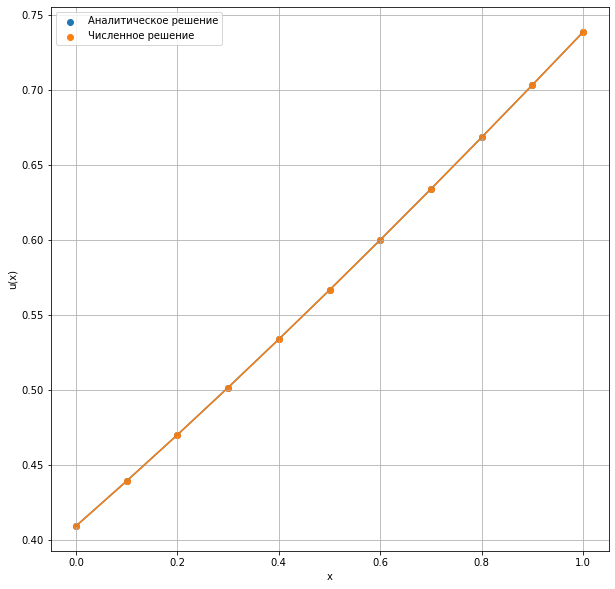

In [9]:
sol.graph()

### Исследование устойчивости

In [10]:
A = []
for n in range(sol.N+1):
    B = []
    for l in range(sol.L+1):
        B.append( a(l*sol.h, n*sol.tau) )
    A.append( max(B) )
max_a   = max(A)
max_tau = 2*sol.h/max_a
print("max_tau/h  равно", max_tau/sol.h)

max_tau/h  равно 1.0


### Точность решения

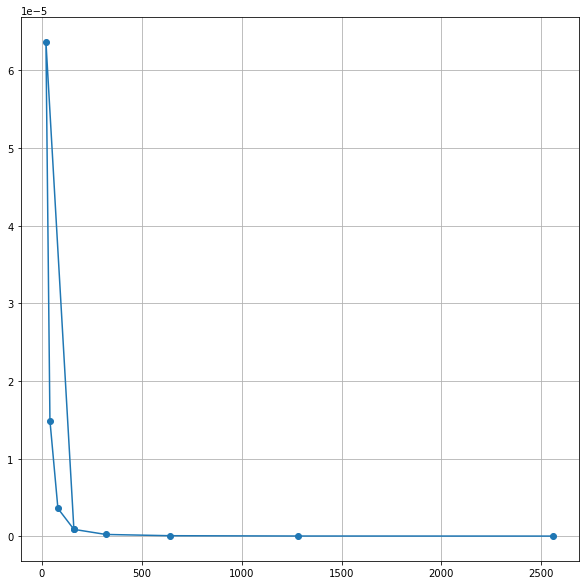

In [11]:
errors = [ sol.error() ]
nodes  = [ sol.L       ]
for i in range(2,10):
    sol = Solution(10*2**i, 10*2**(i-1))
    sol.main()
    errors.append(sol.error())
    nodes.append( sol.L    )
plt.figure(figsize = (10,10)) 
plt.plot(nodes, errors, marker="o")
plt.grid()
plt.show()